<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Regression_Tree_Day_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV

In [8]:
h_data = fetch_california_housing()
df = pd.DataFrame(h_data.data)
df.columns = h_data.feature_names
df['target'] = h_data.target

In [9]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
rt = DecisionTreeRegressor(criterion='squared_error',max_depth=3)

In [34]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [35]:
y_pred = rt.predict(X_test)

In [36]:
r2_score(y_test,y_pred)

0.5097629887358219

[Text(0.5, 0.875, 'x[0] <= 5.086\nsquared_error = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.25, 0.625, 'x[0] <= 3.074\nsquared_error = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 4.314\nsquared_error = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.0625, 0.125, 'squared_error = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.1875, 0.125, 'squared_error = 0.387\nsamples = 3644\nvalue = 1.165'),
 Text(0.375, 0.375, 'x[5] <= 2.418\nsquared_error = 0.827\nsamples = 6833\nvalue = 2.09'),
 Text(0.3125, 0.125, 'squared_error = 1.248\nsamples = 1755\nvalue = 2.736'),
 Text(0.4375, 0.125, 'squared_error = 0.488\nsamples = 5078\nvalue = 1.867'),
 Text(0.75, 0.625, 'x[0] <= 6.888\nsquared_error = 1.218\nsamples = 3411\nvalue = 3.348'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 2.671\nsquared_error = 0.908\nsamples = 2384\nvalue = 2.954'),
 Text(0.5625, 0.125, 'squared_error = 1.012\nsamples = 860\nvalue = 3.518'),
 T

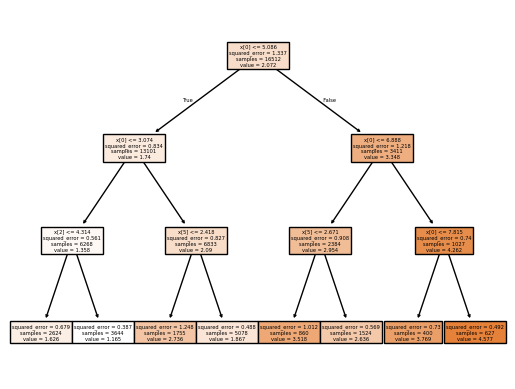

In [37]:
from sklearn.tree import plot_tree
plot_tree(rt,filled=True)

# Hyperparameter Tuning

In [25]:
param_grid = {
    'max_depth':[2,4,8,5,10,None],
    'criterion':['squared_error','absolute_error','poisson'],
    'max_features':['sqrt','log2',0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}


In [28]:
reg = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid,cv=5)

In [ ]:
reg.fit(X_train,y_train)